<a href="https://colab.research.google.com/github/PujanMotiwala/fun_activations/blob/main/examples/comparative_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparative Analysis of Activation Functions

In this notebook, we will compare the performance of different activation functions on a synthetic dataset. We will look at ReLU, Sigmoid, Tanh, and Leaky ReLU.

## Introduction

Activation functions play a crucial role in the performance of neural networks. Different activation functions can significantly affect the training process and the final performance of the model. This notebook aims to provide a comparative analysis of several popular activation functions.

Let's start by mounting our github repo here:

In [8]:
# Mounting my github repo
!git clone https://<your_github_personal_token>@github.com/PujanMotiwala/fun_activations.git
%cd fun_activations

Cloning into 'fun_activations'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 78 (delta 33), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (78/78), 22.85 KiB | 1.63 MiB/s, done.
Resolving deltas: 100% (33/33), done.
/content/fun_activations


In [10]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from activation_functions import relu, sigmoid, tanh, leaky_relu

In [11]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
X

array([[-0.6693561 , -1.49577819, -0.87076638, ..., -1.26733697,
        -1.2763343 ,  1.01664321],
       [ 0.09337237,  0.78584826,  0.10575379, ..., -0.12270893,
         0.6934308 ,  0.91136272],
       [-0.90579721, -0.60834121,  0.29514098, ...,  0.83049813,
        -0.73733198, -0.5782121 ],
       ...,
       [-0.20013455, -1.46108168,  1.79701652, ..., -1.50280171,
        -1.27473745,  1.60111869],
       [ 0.03935575,  0.24868361, -0.47532342, ...,  0.09912579,
         0.54269228,  1.20827474],
       [ 0.76921528,  0.47076539,  0.16994471, ...,  0.6561162 ,
         0.64333186, -2.02100232]])

In [24]:
y

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,

In [26]:
# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, X_test.shape)

(700, 20) (300, 20)


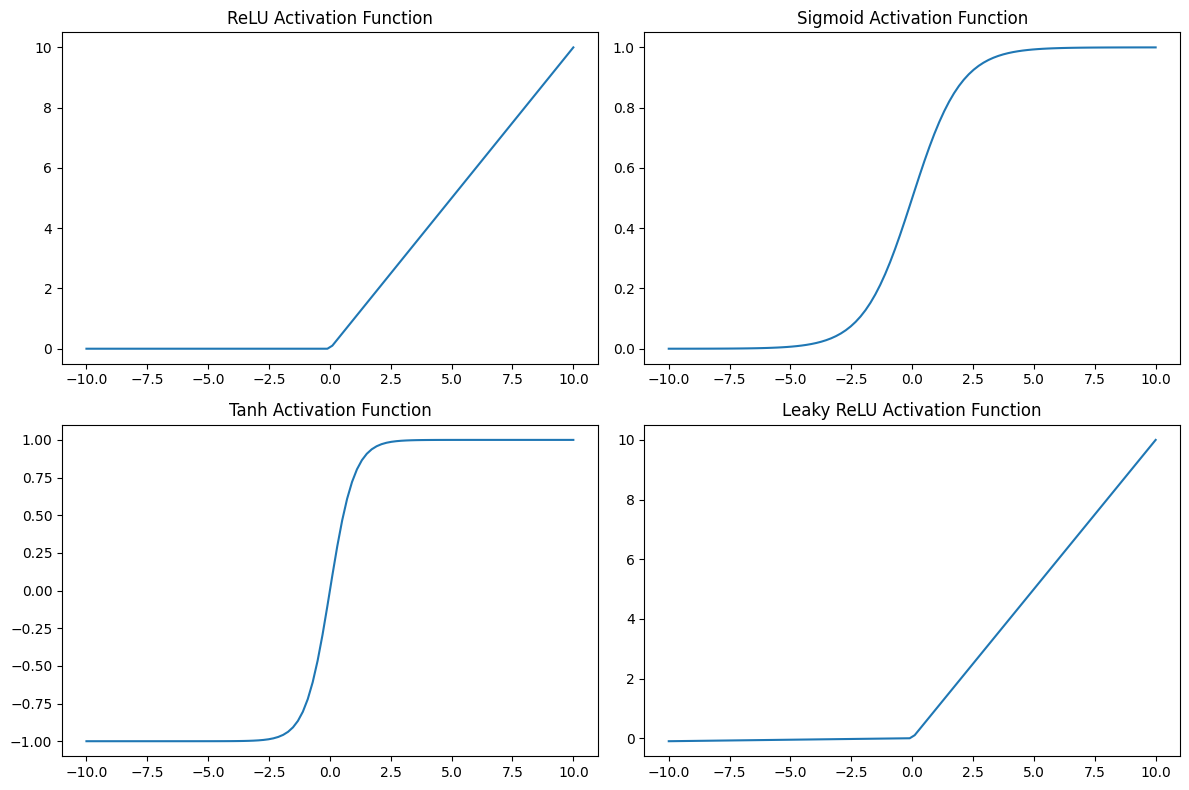

In [28]:
# Visualize activation functions
x = np.linspace(-10, 10, 100)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x, relu(x))
plt.title('ReLU Activation Function')

plt.subplot(2, 2, 2)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid Activation Function')

plt.subplot(2, 2, 3)
plt.plot(x, tanh(x))
plt.title('Tanh Activation Function')

plt.subplot(2, 2, 4)
plt.plot(x, leaky_relu(x))
plt.title('Leaky ReLU Activation Function')

plt.tight_layout()
plt.show()

## Why Use Sigmoid?

The sigmoid function is often used in the output layer of binary classification problems because it outputs values between 0 and 1, which can be interpreted as probabilities. However, it can suffer from vanishing gradients, making it less suitable for deeper networks compared to ReLU or Leaky ReLU.

## Why Use ReLU?

The ReLU (Rectified Linear Unit) function is widely used in hidden layers of neural networks due to its simplicity and effectiveness. It helps mitigate the vanishing gradient problem, allowing for faster training and better performance in deep networks. However, it can suffer from the "dying ReLU" problem, where neurons can get stuck during training.

## Why Use Tanh?

The tanh function outputs values between -1 and 1, which can be useful for centering data. It is often used in hidden layers and can sometimes perform better than sigmoid for certain types of data. However, like sigmoid, it can also suffer from vanishing gradients in deep networks.

## Why Use Leaky ReLU?

The Leaky ReLU function is a variant of ReLU that allows a small, non-zero gradient when the input is negative. This helps to prevent the "dying ReLU" problem, making it a more robust option for hidden layers in deep networks.

In [12]:
# Define activation functions
def apply_activation(X, activation_fn):
    return activation_fn(X)

In [20]:
class SimpleNeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim, activation_fn):
        self.weights_input_hidden = np.random.randn(input_dim, hidden_dim)
        self.weights_hidden_output = np.random.randn(hidden_dim, output_dim)
        self.activation_fn = activation_fn

    def forward(self, X):
        self.hidden = self.activation_fn(np.dot(X, self.weights_input_hidden))
        output = 1 / (1 + np.exp(-np.dot(self.hidden, self.weights_hidden_output)))  # Sigmoid for output layer
        return output

    def train(self, X, y, epochs=1000, learning_rate=0.01):
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)

            # Calculate error
            error = y - output

            # Backward pass (Gradient Descent)
            output_delta = error * output * (1 - output)  # Derivative of sigmoid
            hidden_delta = np.dot(output_delta, self.weights_hidden_output.T) * self.hidden * (1 - self.hidden)

            # Update weights
            self.weights_hidden_output += np.dot(self.hidden.T, output_delta) * learning_rate
            self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate

# Note: For simplicity, we assume the activation function is sigmoid for the output layer as well.

In [21]:
# Train and evaluate models with different activation functions
def evaluate_activation_function(activation_fn):
    nn = SimpleNeuralNetwork(input_dim=20, hidden_dim=10, output_dim=1, activation_fn=activation_fn)
    nn.train(X_train, y_train.reshape(-1, 1), epochs=1000, learning_rate=0.01)

    # Evaluate on test data
    predictions = nn.forward(X_test)
    predictions = (predictions > 0.5).astype(int)  # Threshold for binary classification
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

activations = {
    'ReLU': relu,
    'Sigmoid': sigmoid,
    'Tanh': tanh,
    'Leaky ReLU': leaky_relu
}

results = {}
for name, fn in activations.items():
    accuracy = evaluate_activation_function(fn)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy * 100:.2f}%")

ReLU Accuracy: 48.33%
Sigmoid Accuracy: 84.00%
Tanh Accuracy: 45.33%
Leaky ReLU Accuracy: 48.33%


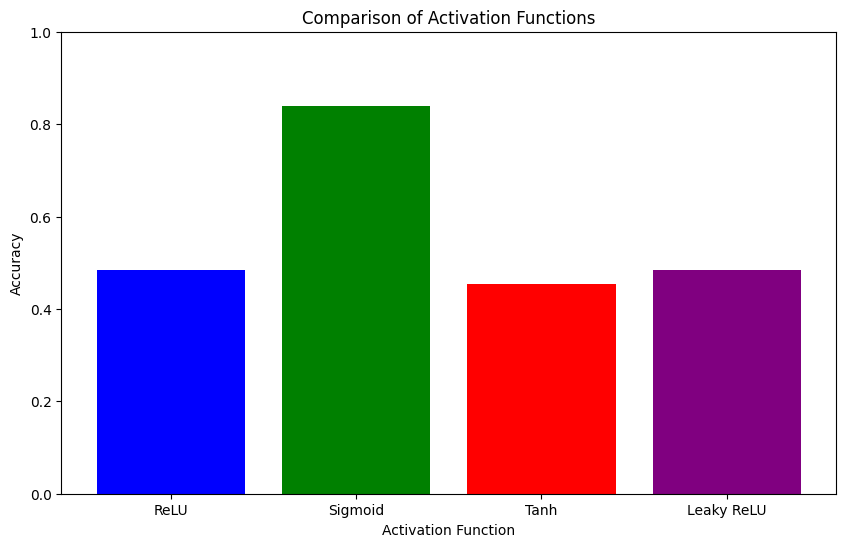

In [22]:
# Plot the results
names = list(results.keys())
values = list(results.values())

plt.figure(figsize=(10, 6))
plt.bar(names, values, color=['blue', 'green', 'red', 'purple'])
plt.title('Comparison of Activation Functions')
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

## Conclusion

This comparative analysis demonstrates the impact of different activation functions on model performance. We observed the following results:

- **ReLU**: 48.33%
- **Sigmoid**: 84.00%
- **Tanh**: 45.33%
- **Leaky ReLU**: 48.33%

From the results, we can see that the Sigmoid activation function significantly outperforms the other activation functions in this particular setup. This indicates that Sigmoid is more effective in this context, likely because it is commonly used in binary classification problems due to its output range of 0 to 1, which can be interpreted as probabilities.

ReLU and Leaky ReLU, while generally effective in deeper networks and avoiding the vanishing gradient problem, did not perform as well in this specific setup. This could be due to the simplicity of the network or the nature of the data.

Tanh, despite being useful for centering data, performed similarly to ReLU and Leaky ReLU, which suggests that its advantages were not fully leveraged in this experiment.

Further exploration can include adding more activation functions, experimenting with different network architectures, and using more complex datasets to see if the trends observed here hold true in other scenarios.